In [2]:
from sys import  path
path.append("../scratch")
import hackathon23_s1

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from funman import Funman
from funman.funman import FUNMANConfig
from funman.model import QueryLE
from funman.model.bilayer import BilayerDynamics, BilayerGraph, BilayerModel
from funman.model.query import QueryEncoded, QueryTrue
from funman.scenario import ConsistencyScenario, ConsistencyScenarioResult
from funman.scenario.scenario import AnalysisScenario
from funman.scenario.parameter_synthesis import ParameterSynthesisScenario
from funman.utils.handlers import ResultCombinedHandler
from funman_demo.handlers import RealtimeResultPlotter, ResultCacheWriter, NotebookImageRefresher

# %load_ext autoreload
# %autoreload 2

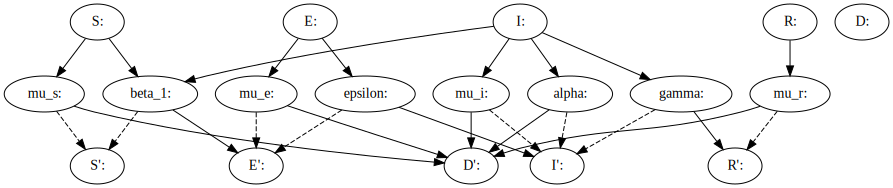

In [3]:
tc = hackathon23_s1.TestUseCases()
steps = 2
tc.iteration = 0
mu = [0.00008, 0.078, 0.19]
config = FUNMANConfig(max_steps=steps, solver="dreal")
bilayer = BilayerDynamics(json_graph=tc.initial_bilayer())
bilayer.to_dot()

# Testcase 1, R0 = 5.72

Bounds: {'mu_s': [8e-05, 8e-05], 'mu_e': [8e-05, 8e-05], 'mu_i': [8e-05, 8e-05], 'mu_r': [8e-05, 8e-05], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.006, 0.006], 'gamma': [0.125, 0.125]}
Iteration 0: {'beta_1': 0.75, 'gamma': 0.125, 'mu_s': 8e-05, 'mu_e': 8e-05, 'mu_i': 8e-05, 'mu_r': 8e-05, 'alpha': 0.006, 'epsilon': 0.33}
   index              I             S         R             E          D
0      0       1.000000  4.998990e+05  0.000000  1.000000e+02   0.000000
1      1      33.868920  1.249348e+05  0.125000  3.749912e+05  40.006000
2      2  123776.539242 -3.048629e+06  4.358605  3.424768e+06  80.206013


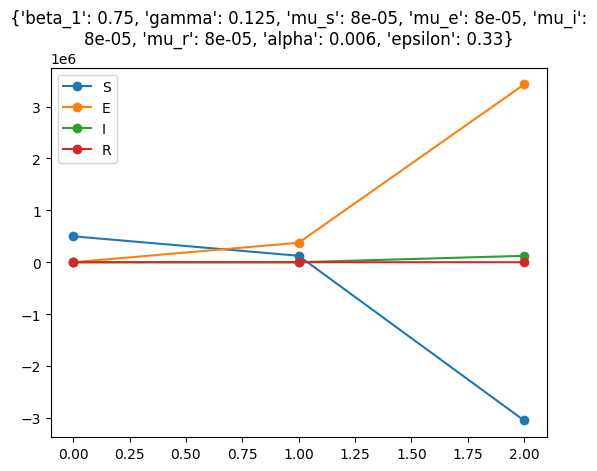

<Figure size 640x480 with 0 Axes>

: 

In [ ]:
###########################################################
# Unit Test 1, using Paper Parameters
###########################################################
testcase = 0
# print("Dynamics + simA params + well formed ...")
print(f"Bounds: {tc.unit_test_1_bounds()}")
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(mu=mu[testcase]),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)

In [ ]:
###########################################################
# The basic constraints are satisfied, but output diverges,
# need to check that population is consistent (doesn't exceed N)
# Generate results using any parameters
###########################################################
print(f"Bounds: {tc.unit_test_1_bounds(mu=mu[testcase])}")
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(mu=mu[testcase]),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)

Bounds: {'mu_s': [8e-05, 8e-05], 'mu_e': [8e-05, 8e-05], 'mu_i': [8e-05, 8e-05], 'mu_r': [8e-05, 8e-05], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.006, 0.006], 'gamma': [0.125, 0.125]}
Iteration 1: is inconsistent


: 

Iteration 2: {'beta_1': 1.0000000000000002e-06, 'gamma': 0.125, 'mu_s': 8e-05, 'mu_e': 8e-05, 'mu_i': 8e-05, 'mu_r': 8e-05, 'alpha': 0.006, 'epsilon': 0.33}
   index          I              S         R           E          D
0      0   1.000000  499899.000000  0.000000  100.000000   0.000000
1      1  33.868920  499858.494745  0.125000   67.491899  40.006000
2      2  51.701709  499801.121368  4.358605   62.139405  80.206012


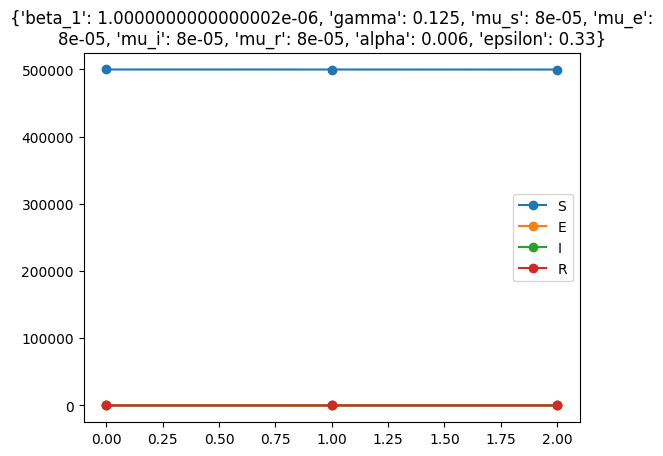

<Figure size 640x480 with 0 Axes>

: 

In [ ]:
###########################################################
# Basic constraints are not satisfied, so relax them
###########################################################
bounds=tc.unit_test_1_bounds(
        mu=mu[testcase]
    )
bounds['beta_1'] = [1e-6, 2e-1]
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    bounds,
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)

# Testcase 2, R0 = 3

Bounds: {'mu_s': [0.078, 0.078], 'mu_e': [0.078, 0.078], 'mu_i': [0.078, 0.078], 'mu_r': [0.078, 0.078], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.006, 0.006], 'gamma': [0.125, 0.125]}
Iteration 3: {'beta_1': 0.75, 'gamma': 0.125, 'mu_s': 0.07800000000000001, 'mu_e': 0.07800000000000001, 'mu_i': 0.07800000000000001, 'mu_r': 0.07800000000000001, 'alpha': 0.006, 'epsilon': 0.33}
   index              I             S         R             E             D
0      0       1.000000  4.998990e+05  0.000000  1.000000e+02      0.000000
1      1      33.791000  8.598263e+04  0.125000  3.749834e+05  39000.006000
2      2  123771.267181 -2.099803e+06  4.339125  2.401069e+06  74958.208278


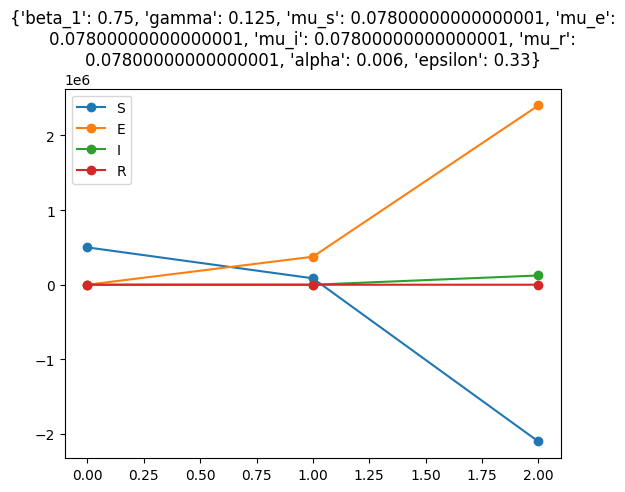

<Figure size 640x480 with 0 Axes>

: 

In [ ]:
###########################################################
# Unit Test 2, using Paper Parameters
###########################################################
testcase = 1
# print("Dynamics + simA params + well formed ...")
print(f"Bounds: {tc.unit_test_1_bounds(mu=mu[testcase])}")
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(mu=mu[testcase]),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)

In [ ]:
###########################################################
# The basic constraints are satisfied, but output diverges,
# need to check that population is consistent (doesn't exceed N)
# Generate results using any parameters
###########################################################
print(f"Bounds: {tc.unit_test_1_bounds(mu=mu[testcase])}")
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(mu=mu[testcase]),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)


Bounds: {'mu_s': [0.078, 0.078], 'mu_e': [0.078, 0.078], 'mu_i': [0.078, 0.078], 'mu_r': [0.078, 0.078], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.006, 0.006], 'gamma': [0.125, 0.125]}
Iteration 5: is inconsistent


: 

Iteration 6: {'beta_1': 1.0000000000000002e-06, 'gamma': 0.125, 'mu_s': 0.07800000000000001, 'mu_e': 0.07800000000000001, 'mu_i': 0.07800000000000001, 'mu_r': 0.07800000000000001, 'alpha': 0.006, 'epsilon': 0.33}
   index          I              S         R           E             D
0      0   1.000000  499899.000000  0.000000  100.000000      0.000000
1      1  33.791000  460906.363906  0.125000   59.699899  39000.006000
2      2  46.429648  424939.649690  4.339125   50.911036  74958.207171


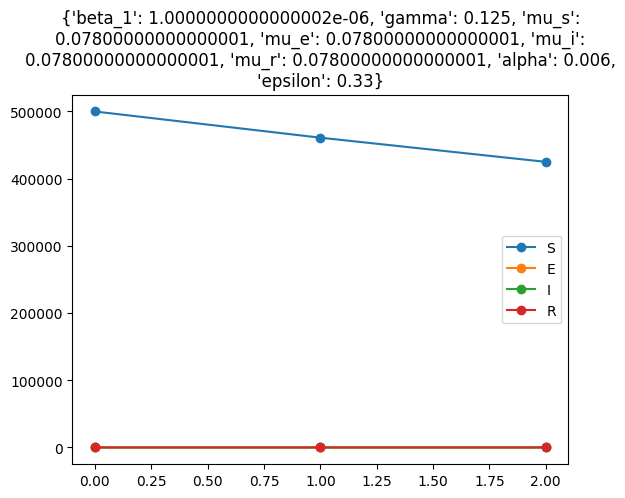

<Figure size 640x480 with 0 Axes>

: 

In [ ]:

###########################################################
# Basic constraints are not satisfied, so relax them
###########################################################
bounds = tc.unit_test_1_bounds(
                mu=mu[testcase],                
            )
bounds['beta_1'] = [1e-6, 2e-1]
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    bounds,
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)



# Testcase 3, R0 = 1.5

Bounds: {'mu_s': [0.19, 0.19], 'mu_e': [0.19, 0.19], 'mu_i': [0.19, 0.19], 'mu_r': [0.19, 0.19], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.006, 0.006], 'gamma': [0.125, 0.125]}
Iteration 7: {'beta_1': 0.75, 'gamma': 0.125, 'mu_s': 0.19, 'mu_e': 0.19, 'mu_i': 0.19, 'mu_r': 0.19, 'alpha': 0.006, 'epsilon': 0.33}
   index              I              S         R              E              D
0      0       1.000000  499899.000000  0.000000     100.000000       0.000000
1      1      33.679000   29993.940000  0.125000  374972.250000   95000.006000
2      2  123763.710541 -733329.337545  4.311125  937611.108945  171950.206934


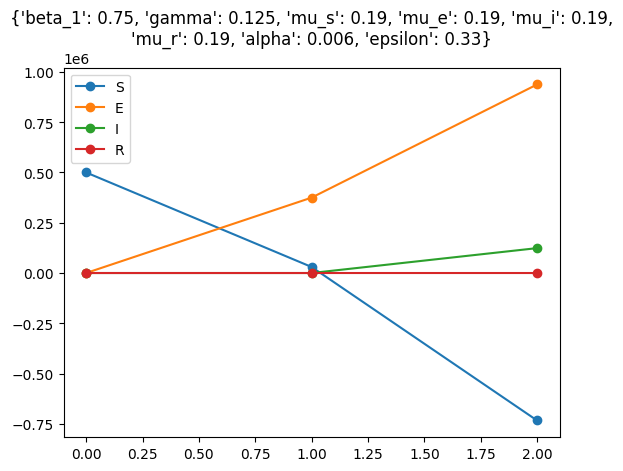

<Figure size 640x480 with 0 Axes>

: 

In [ ]:
###########################################################
# Unit Test 3, using Paper Parameters
###########################################################
testcase = 2
# print("Dynamics + simA params + well formed ...")
print(f"Bounds: { tc.unit_test_1_bounds(mu=mu[testcase])}")
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(mu=mu[testcase]),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)


In [ ]:

###########################################################
# The basic constraints are satisfied, but output diverges,
# need to check that population is consistent (doesn't exceed N)
# Generate results using any parameters
###########################################################
print(f"Bounds: {tc.unit_test_1_bounds(mu=mu[testcase])}")
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(mu=mu[testcase]),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)


Bounds: {'mu_s': [0.19, 0.19], 'mu_e': [0.19, 0.19], 'mu_i': [0.19, 0.19], 'mu_r': [0.19, 0.19], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.006, 0.006], 'gamma': [0.125, 0.125]}
Iteration 8: is inconsistent


: 

Iteration 9: {'beta_1': 1.0000000000000002e-06, 'gamma': 0.125, 'mu_s': 0.19, 'mu_e': 0.19, 'mu_i': 0.19, 'mu_r': 0.19, 'alpha': 0.006, 'epsilon': 0.33}
   index          I              S         R           E              D
0      0   1.000000  499899.000000  0.000000  100.000000       0.000000
1      1  33.679000  404917.675886  0.125000   48.499899   95000.006000
2      2  38.873008  327969.289757  4.311125   36.909782  171950.204233


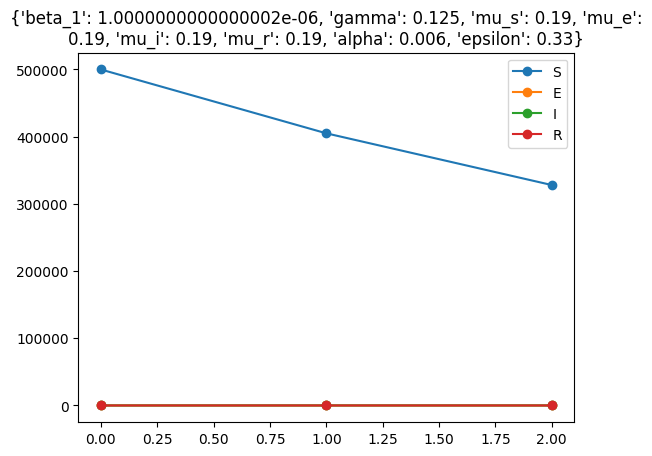

<Figure size 640x480 with 0 Axes>

: 

In [ ]:
###########################################################
# Basic constraints are not satisfied, so relax them
###########################################################
bounds = tc.unit_test_1_bounds(
        mu=mu[testcase],
    )
bounds['beta_1'] = [1e-6, 2e-1]
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    bounds,
    # tc.unit_test_1_bounds(
    #     mu=mu[testcase],
    #     tolerance=3.0,
    #     relax=[
    #         # "mu_s",
    #         # "mu_e",
    #         # "mu_i",
    #         # "mu_r",
    #         # "beta_1",
    #         # "epsilon",
    #         "alpha",
    #         "gamma",
    #     ]
    # ),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)

In [ ]:
tc.results_df

,beta_1,gamma,mu_s,mu_e,mu_i,mu_r,alpha,epsilon
0,0.750000,0.125,0.00008,0.00008,0.00008,0.00008,0.006,0.33
2,0.000001,0.125,0.00008,0.00008,0.00008,0.00008,0.006,0.33
3,0.750000,0.125,0.07800,0.07800,0.07800,0.07800,0.006,0.33
6,0.000001,0.125,0.07800,0.07800,0.07800,0.07800,0.006,0.33
7,0.750000,0.125,0.19000,0.19000,0.19000,0.19000,0.006,0.33
9,0.000001,0.125,0.19000,0.19000,0.19000,0.19000,0.006,0.33


: 

In [1]:
###########################################################
# Synthesize beta_1
###########################################################
bounds = tc.unit_test_1_bounds()
bounds["beta_1"] = [1e-7, 5e-2]
bounds["mu_s"] = [0.00008, 0.19]
bounds["mu_i"] = [0.00008, 0.19]
bounds["mu_e"] = [0.00008, 0.19]
bounds["mu_r"] = [0.00008, 0.19]
scenario = tc.make_ps_scenario(
    bilayer,
    tc.initial_state(),
    bounds,
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
config.tolerance = 1e-2
config.number_of_processes = 1
config._handler = ResultCombinedHandler(
    [
        ResultCacheWriter(f"box_search.json"),
        # NotebookImageRefresher("box_search.png"),
        RealtimeResultPlotter(
            scenario.parameters,
            plot_points=True,
            title=f"Feasible Regions (beta)",
            realtime_save_path=f"box_search.png",
        ),
    ]
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)

NameError: name 'tc' is not defined